# Inteligencia Artificial
## Proyecto I: Aprendizaje por Reflejo
- Nicolás Concuá - 23197
- Esteban Carcamo - 23016
### Predicción de Precios de Viviendas


---

**Objetivo:** Desarrollar un modelo de regresión para predecir precios de viviendas utilizando el dataset proporcionado.

**Responsabilidades:**
- Exploración y análisis de datos
- Preprocesamiento (imputación, encoding, escalamiento)
- Separación de datos (train/validation)
- [Tu compañero: Entrenamiento y comparación de modelos]

## 1. Importación de Librerías

In [1]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np
import pickle

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# División de datos
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Modelos y métricas
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga de Datos

In [2]:
# Cargar los datasets
# NOTA: Ajustar las rutas según donde tengas guardados los archivos
features = pd.read_csv('training_features.csv')
target = pd.read_csv('training_target.csv')

print("✓ Datos cargados correctamente")
print(f"\nDimensiones de features: {features.shape}")
print(f"Dimensiones de target: {target.shape}")

✓ Datos cargados correctamente

Dimensiones de features: (2344, 79)
Dimensiones de target: (2344, 1)


In [3]:
# Verificar que la cantidad de filas coincida
assert features.shape[0] == target.shape[0], "¡ERROR! El número de filas no coincide entre features y target"

print(f"✓ Verificación exitosa: {features.shape[0]} instancias en ambos datasets")
print(f"\nNúmero total de variables predictoras: {features.shape[1]}")

✓ Verificación exitosa: 2344 instancias en ambos datasets

Número total de variables predictoras: 79


## 3. Exploración Inicial de Datos

### 3.1 Inspección de las Primeras Filas

In [4]:
# Visualizar primeras filas de features
print("Primeras 5 filas de training_features:\n")
features.head()

Primeras 5 filas de training_features:



,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1976,1976,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1090.0,1090.0,GasA,TA,Y,SBrkr,1370,0,0,1370,0.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,479.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2009,WD,Family
1,60,RL,NaN,28698,Pave,NaN,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,2Story,5,5,1967,1967,Flat,Tar&Grv,Plywood,Plywood,NaN,0.0,TA,TA,PConc,TA,Gd,Gd,LwQ,249.0,ALQ,764.0,0.0,1013.0,GasA,TA,Y,SBrkr,1160,966,0,2126,0.0,1.0,2,1,3,1,TA,7,Min2,0,NaN,Attchd,1967.0,Fin,2.0,538.0,TA,TA,Y,486,0,0,0,225,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml
2,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1224,0,0,1224,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1962.0,Unf,2.0,462.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
3,90,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1949,1950,Gable,CompShg,BrkFace,Stone,NaN,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1956.0,Unf,2.0,420.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
4,190,RM,63.0,7627,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,2fmCon,2Story,4,6,1920,1950,Gable,CompShg,AsbShng,AsbShng,NaN,0.0,Fa,TA,BrkTil,Fa,Po,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Gd,N,SBrkr,1101,600,0,1701,0.0,0.0,2,0,4,2,Fa,8,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,148,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal


In [5]:
# Visualizar primeras filas de target
print("Primeras 10 filas de training_target:\n")
target.head(10)

Primeras 10 filas de training_target:



,SalePrice
0,152000
1,185000
2,101800
3,90000
4,94550
5,211000
6,286000
7,140000
8,129000
9,293200


### 3.2 Información General del Dataset

In [6]:
# Información de tipos de datos y valores no nulos
print("Información general del dataset de features:\n")
features.info()

Información general del dataset de features:

<class 'pandas.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2344 non-null   int64  
 1   MS Zoning        2344 non-null   str    
 2   Lot Frontage     1951 non-null   float64
 3   Lot Area         2344 non-null   int64  
 4   Street           2344 non-null   str    
 5   Alley            162 non-null    str    
 6   Lot Shape        2344 non-null   str    
 7   Land Contour     2344 non-null   str    
 8   Utilities        2344 non-null   str    
 9   Lot Config       2344 non-null   str    
 10  Land Slope       2344 non-null   str    
 11  Neighborhood     2344 non-null   str    
 12  Condition 1      2344 non-null   str    
 13  Condition 2      2344 non-null   str    
 14  Bldg Type        2344 non-null   str    
 15  House Style      2344 non-null   str    
 16  Overall Qual     2344 non

In [7]:
# Identificar tipos de variables
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(include=['object']).columns.tolist()

print("=" * 70)
print("RESUMEN DE TIPOS DE VARIABLES")
print("=" * 70)
print(f"\nVariables numéricas: {len(numeric_features)}")
print(f"Variables categóricas: {len(categorical_features)}")
print(f"Total de variables: {len(numeric_features) + len(categorical_features)}")
print("\n" + "=" * 70)

RESUMEN DE TIPOS DE VARIABLES

Variables numéricas: 36
Variables categóricas: 43
Total de variables: 79



In [8]:
# Listar variables por tipo
print("\nVariables numéricas:")
for i, col in enumerate(numeric_features, 1):
    print(f"{i:2d}. {col}")

print(f"\n{'='*70}\n")
print("Variables categóricas:")
for i, col in enumerate(categorical_features, 1):
    print(f"{i:2d}. {col}")


Variables numéricas:
 1. MS SubClass
 2. Lot Frontage
 3. Lot Area
 4. Overall Qual
 5. Overall Cond
 6. Year Built
 7. Year Remod/Add
 8. Mas Vnr Area
 9. BsmtFin SF 1
10. BsmtFin SF 2
11. Bsmt Unf SF
12. Total Bsmt SF
13. 1st Flr SF
14. 2nd Flr SF
15. Low Qual Fin SF
16. Gr Liv Area
17. Bsmt Full Bath
18. Bsmt Half Bath
19. Full Bath
20. Half Bath
21. Bedroom AbvGr
22. Kitchen AbvGr
23. TotRms AbvGrd
24. Fireplaces
25. Garage Yr Blt
26. Garage Cars
27. Garage Area
28. Wood Deck SF
29. Open Porch SF
30. Enclosed Porch
31. 3Ssn Porch
32. Screen Porch
33. Pool Area
34. Misc Val
35. Mo Sold
36. Yr Sold


Variables categóricas:
 1. MS Zoning
 2. Street
 3. Alley
 4. Lot Shape
 5. Land Contour
 6. Utilities
 7. Lot Config
 8. Land Slope
 9. Neighborhood
10. Condition 1
11. Condition 2
12. Bldg Type
13. House Style
14. Roof Style
15. Roof Matl
16. Exterior 1st
17. Exterior 2nd
18. Mas Vnr Type
19. Exter Qual
20. Exter Cond
21. Foundation
22. Bsmt Qual
23. Bsmt Cond
24. Bsmt Exposure
25. Bs

### 3.3 Análisis de la Variable Objetivo (SalePrice)

In [9]:
# Estadísticas descriptivas del precio
print("Estadísticas de la variable objetivo (SalePrice):\n")
print(target['SalePrice'].describe())

print(f"\nRango de precios: ${target['SalePrice'].min():,.0f} - ${target['SalePrice'].max():,.0f}")
print(f"Precio promedio: ${target['SalePrice'].mean():,.2f}")
print(f"Precio mediano: ${target['SalePrice'].median():,.2f}")

Estadísticas de la variable objetivo (SalePrice):

count      2344.000000
mean     178582.207765
std       77125.072713
min       12789.000000
25%      129000.000000
50%      160000.000000
75%      210000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Rango de precios: $12,789 - $755,000
Precio promedio: $178,582.21
Precio mediano: $160,000.00


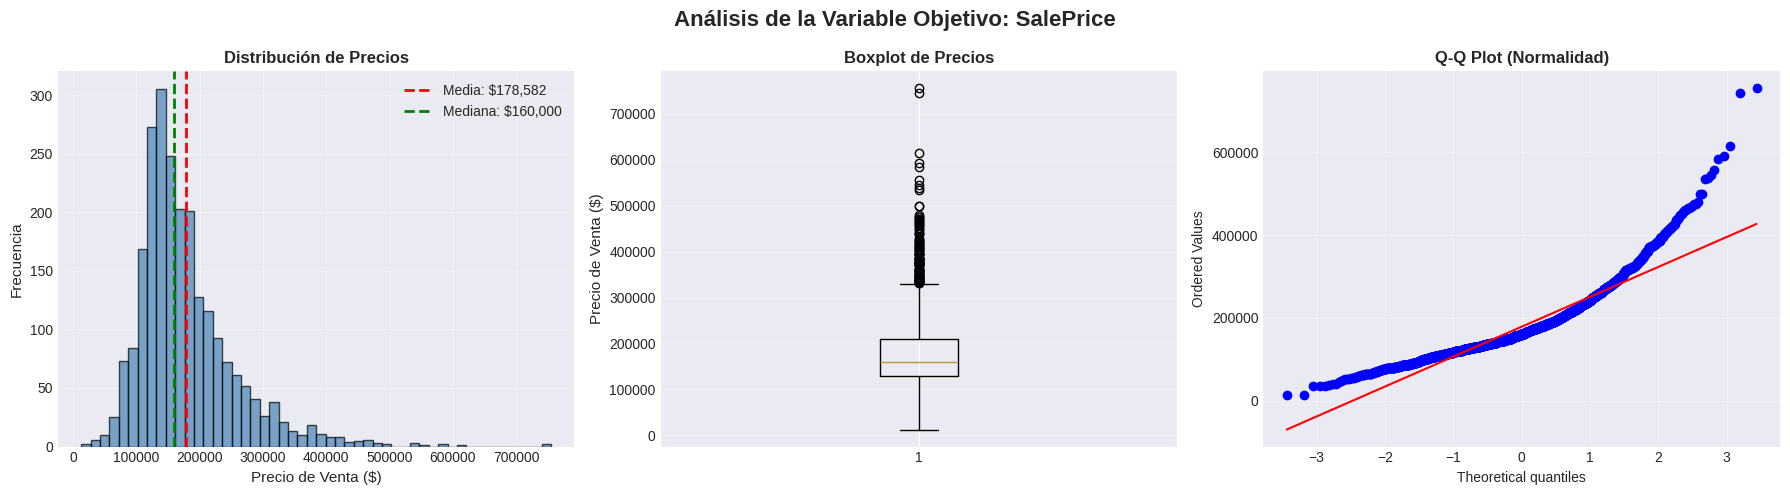


 Observaciones:
- La distribución presenta sesgo hacia la derecha (asimetría positiva)
- Se observan valores atípicos en el extremo superior
- Considerar transformación logarítmica si es necesario para los modelos


In [10]:
# Visualización de la distribución del precio
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de la Variable Objetivo: SalePrice', fontsize=16, fontweight='bold')

# Histograma
axes[0].hist(target['SalePrice'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(target['SalePrice'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Media: ${target["SalePrice"].mean():,.0f}')
axes[0].axvline(target['SalePrice'].median(), color='green', linestyle='--', linewidth=2,
                label=f'Mediana: ${target["SalePrice"].median():,.0f}')
axes[0].set_xlabel('Precio de Venta ($)', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontsize=11)
axes[0].set_title('Distribución de Precios', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(target['SalePrice'], vert=True)
axes[1].set_ylabel('Precio de Venta ($)', fontsize=11)
axes[1].set_title('Boxplot de Precios', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Q-Q plot para evaluar normalidad
from scipy import stats
stats.probplot(target['SalePrice'], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normalidad)', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Observaciones:")
print("- La distribución presenta sesgo hacia la derecha (asimetría positiva)")
print("- Se observan valores atípicos en el extremo superior")
print("- Considerar transformación logarítmica si es necesario para los modelos")

### 3.4 Análisis de Valores Faltantes

In [11]:
# Calcular porcentaje de valores faltantes
missing_values = features.isnull().sum()
missing_percent = (missing_values / len(features)) * 100

# Crear DataFrame con información de valores faltantes
missing_df = pd.DataFrame({
    'Variable': missing_values.index,
    'Valores_Faltantes': missing_values.values,
    'Porcentaje': missing_percent.values
})

# Filtrar solo variables con valores faltantes
missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values(
    'Porcentaje', ascending=False
).reset_index(drop=True)

print("=" * 70)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 70)
print(f"\nVariables con valores faltantes: {len(missing_df)} de {features.shape[1]}")
print(f"\nVariables con más del 50% de valores faltantes: {len(missing_df[missing_df['Porcentaje'] > 50])}")
print("\n" + "=" * 70)

ANÁLISIS DE VALORES FALTANTES

Variables con valores faltantes: 26 de 79

Variables con más del 50% de valores faltantes: 5



In [12]:
# Mostrar todas las variables con valores faltantes
if len(missing_df) > 0:
    print("\nVariables con valores faltantes (ordenadas por porcentaje):\n")
    print(missing_df.to_string(index=False))
else:
    print("\n✓ No hay valores faltantes en el dataset")


Variables con valores faltantes (ordenadas por porcentaje):

      Variable  Valores_Faltantes  Porcentaje
       Pool QC               2332   99.488055
  Misc Feature               2250   95.989761
         Alley               2182   93.088737
         Fence               1874   79.948805
  Mas Vnr Type               1426   60.836177
  Fireplace Qu               1144   48.805461
  Lot Frontage                393   16.766212
   Garage Cond                122    5.204778
 Garage Yr Blt                122    5.204778
 Garage Finish                122    5.204778
   Garage Qual                122    5.204778
   Garage Type                120    5.119454
 Bsmt Exposure                 63    2.687713
BsmtFin Type 2                 62    2.645051
     Bsmt Qual                 61    2.602389
BsmtFin Type 1                 61    2.602389
     Bsmt Cond                 61    2.602389
  Mas Vnr Area                 19    0.810580
  BsmtFin SF 1                  1    0.042662
Bsmt Half Bath    

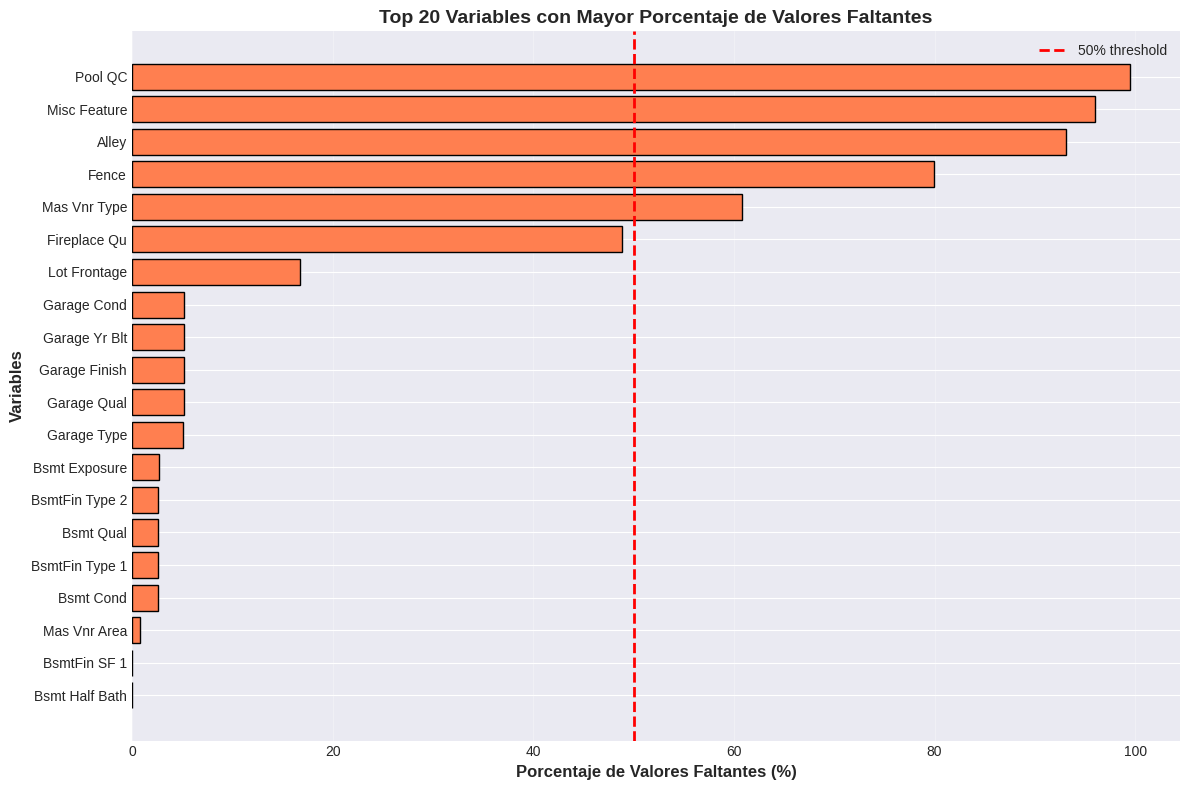

In [13]:
# Visualización de valores faltantes (top 20)
if len(missing_df) > 0:
    top_missing = missing_df.head(20)
    
    plt.figure(figsize=(12, 8))
    plt.barh(top_missing['Variable'], top_missing['Porcentaje'], color='coral', edgecolor='black')
    plt.xlabel('Porcentaje de Valores Faltantes (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Variables', fontsize=12, fontweight='bold')
    plt.title('Top 20 Variables con Mayor Porcentaje de Valores Faltantes', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    # Añadir línea en 50%
    plt.axvline(x=50, color='red', linestyle='--', linewidth=2, label='50% threshold')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### 3.5 Estadísticas Descriptivas de Variables Numéricas

In [14]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas de variables numéricas:\n")
features[numeric_features].describe().round(2)

Estadísticas descriptivas de variables numéricas:



,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,2344.00,1951.00,2344.00,2344.00,2344.00,2344.00,2344.00,2325.00,2343.00,2343.0,2343.00,2343.00,2344.00,2344.00,2344.00,2344.00,2343.00,2343.00,2344.00,2344.00,2344.00,2344.00,2344.00,2344.00,2222.00,2343.00,2343.00,2344.00,2344.00,2344.00,2344.00,2344.00,2344.00,2344.00,2344.00,2344.00
mean,57.31,69.21,10127.86,6.06,5.58,1970.51,1983.92,98.54,442.53,50.1,554.39,1047.02,1154.81,333.69,4.36,1492.86,0.43,0.06,1.56,0.37,2.85,1.04,6.41,0.60,1977.40,1.75,469.08,94.11,47.34,24.73,2.42,16.01,2.58,58.06,6.18,2007.79
std,42.80,23.42,8050.91,1.39,1.11,30.34,20.79,172.24,452.22,170.4,433.79,436.57,385.11,427.14,44.32,504.62,0.53,0.24,0.55,0.50,0.82,0.21,1.56,0.65,25.68,0.75,212.43,124.85,68.04,67.03,24.52,55.82,38.32,623.38,2.71,1.32
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.0,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,20.00,58.00,7466.50,5.00,5.00,1953.00,1965.00,0.00,0.00,0.0,218.00,784.00,879.75,0.00,0.00,1121.75,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1960.00,1.00,319.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,50.00,68.00,9356.50,6.00,5.00,1972.00,1992.00,0.00,375.00,0.0,462.00,988.00,1082.00,0.00,0.00,1436.50,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1978.00,2.00,476.00,0.00,26.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,70.00,80.00,11484.25,7.00,6.00,2000.00,2003.00,160.00,734.00,0.0,795.50,1288.00,1378.00,701.00,0.00,1734.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2001.00,2.00,576.00,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1290.00,5644.00,1526.0,2336.00,6110.00,5095.00,2065.00,1064.00,5642.00,3.00,2.00,4.00,2.00,8.00,3.00,15.00,4.00,2207.00,4.00,1488.00,870.00,742.00,1012.00,508.00,576.00,800.00,17000.00,12.00,2010.00


### 3.6 Análisis de Variables Categóricas

In [15]:
# Analizar cardinalidad de variables categóricas
categorical_info = pd.DataFrame({
    'Variable': categorical_features,
    'Valores_Unicos': [features[col].nunique() for col in categorical_features],
    'Valor_Mas_Frecuente': [features[col].mode()[0] if len(features[col].mode()) > 0 else None 
                            for col in categorical_features],
    'Frecuencia_Max': [features[col].value_counts().iloc[0] if len(features[col]) > 0 else 0 
                       for col in categorical_features]
}).sort_values('Valores_Unicos', ascending=False)

print("Información de variables categóricas:\n")
print(categorical_info.to_string(index=False))

Información de variables categóricas:

      Variable  Valores_Unicos Valor_Mas_Frecuente  Frecuencia_Max
  Neighborhood              28               NAmes             367
  Exterior 1st              16             VinylSd             803
  Exterior 2nd              16             VinylSd             796
     Sale Type              10                 WD             2046
   Condition 1               9                Norm            2015
   House Style               8              1Story            1191
    Functional               8                 Typ            2183
     Roof Matl               8             CompShg            2304
   Condition 2               8                Norm            2324
     MS Zoning               7                  RL            1818
    Roof Style               6               Gable            1859
BsmtFin Type 1               6                 GLQ             677
Sale Condition               6              Normal            1942
       Heating         

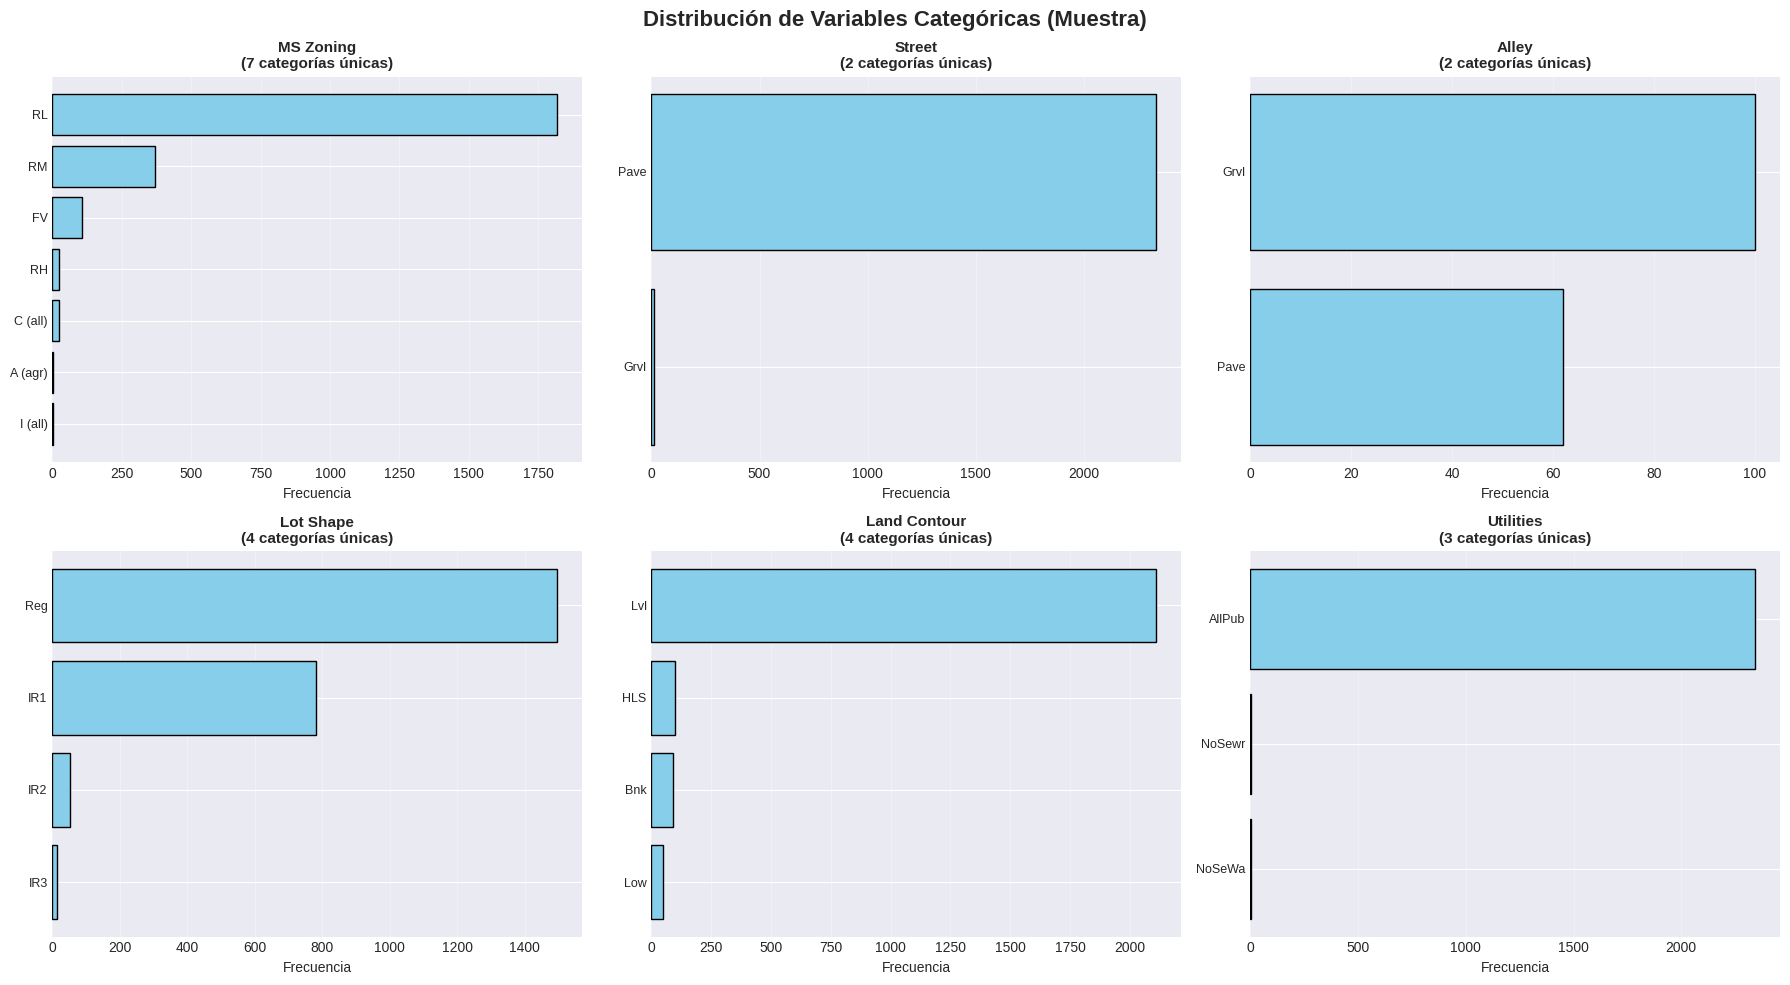

In [16]:
# Visualizar distribución de algunas variables categóricas clave
# Seleccionar las primeras 6 variables categóricas para visualizar
vars_to_plot = categorical_features[:6]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Variables Categóricas (Muestra)', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, col in enumerate(vars_to_plot):
    value_counts = features[col].value_counts().head(10)
    axes[idx].barh(range(len(value_counts)), value_counts.values, color='skyblue', edgecolor='black')
    axes[idx].set_yticks(range(len(value_counts)))
    axes[idx].set_yticklabels(value_counts.index, fontsize=9)
    axes[idx].set_xlabel('Frecuencia', fontsize=10)
    axes[idx].set_title(f'{col}\n({features[col].nunique()} categorías únicas)', 
                       fontsize=11, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 3.7 Análisis de Correlaciones (Variables Numéricas)

In [17]:
# Combinar features con target para análisis de correlación
data_with_target = features[numeric_features].copy()
data_with_target['SalePrice'] = target['SalePrice'].values

# Calcular correlaciones con el target
correlations = data_with_target.corr()['SalePrice'].sort_values(ascending=False)

print("=" * 70)
print("CORRELACIÓN DE VARIABLES NUMÉRICAS CON SALEPRICE")
print("=" * 70)
print("\nTop 15 variables más correlacionadas (positivamente):\n")
print(correlations.head(16))  # 16 porque incluye SalePrice

print("\nTop 10 variables menos correlacionadas (o negativamente):\n")
print(correlations.tail(10))

CORRELACIÓN DE VARIABLES NUMÉRICAS CON SALEPRICE

Top 15 variables más correlacionadas (positivamente):

SalePrice         1.000000
Overall Qual      0.795298
Gr Liv Area       0.698315
Garage Cars       0.644304
Garage Area       0.633106
Total Bsmt SF     0.612256
1st Flr SF        0.607433
Year Built        0.545409
Full Bath         0.542053
Year Remod/Add    0.517653
Garage Yr Blt     0.516211
Mas Vnr Area      0.490912
TotRms AbvGrd     0.475455
Fireplaces        0.467501
BsmtFin SF 1      0.423906
Wood Deck SF      0.333045
Name: SalePrice, dtype: float64

Top 10 variables menos correlacionadas (o negativamente):

Mo Sold            0.030714
BsmtFin SF 2       0.027205
Low Qual Fin SF   -0.016025
Misc Val          -0.017729
Bsmt Half Bath    -0.023675
Yr Sold           -0.037686
MS SubClass       -0.066351
Overall Cond      -0.104085
Kitchen AbvGr     -0.115860
Enclosed Porch    -0.130722
Name: SalePrice, dtype: float64


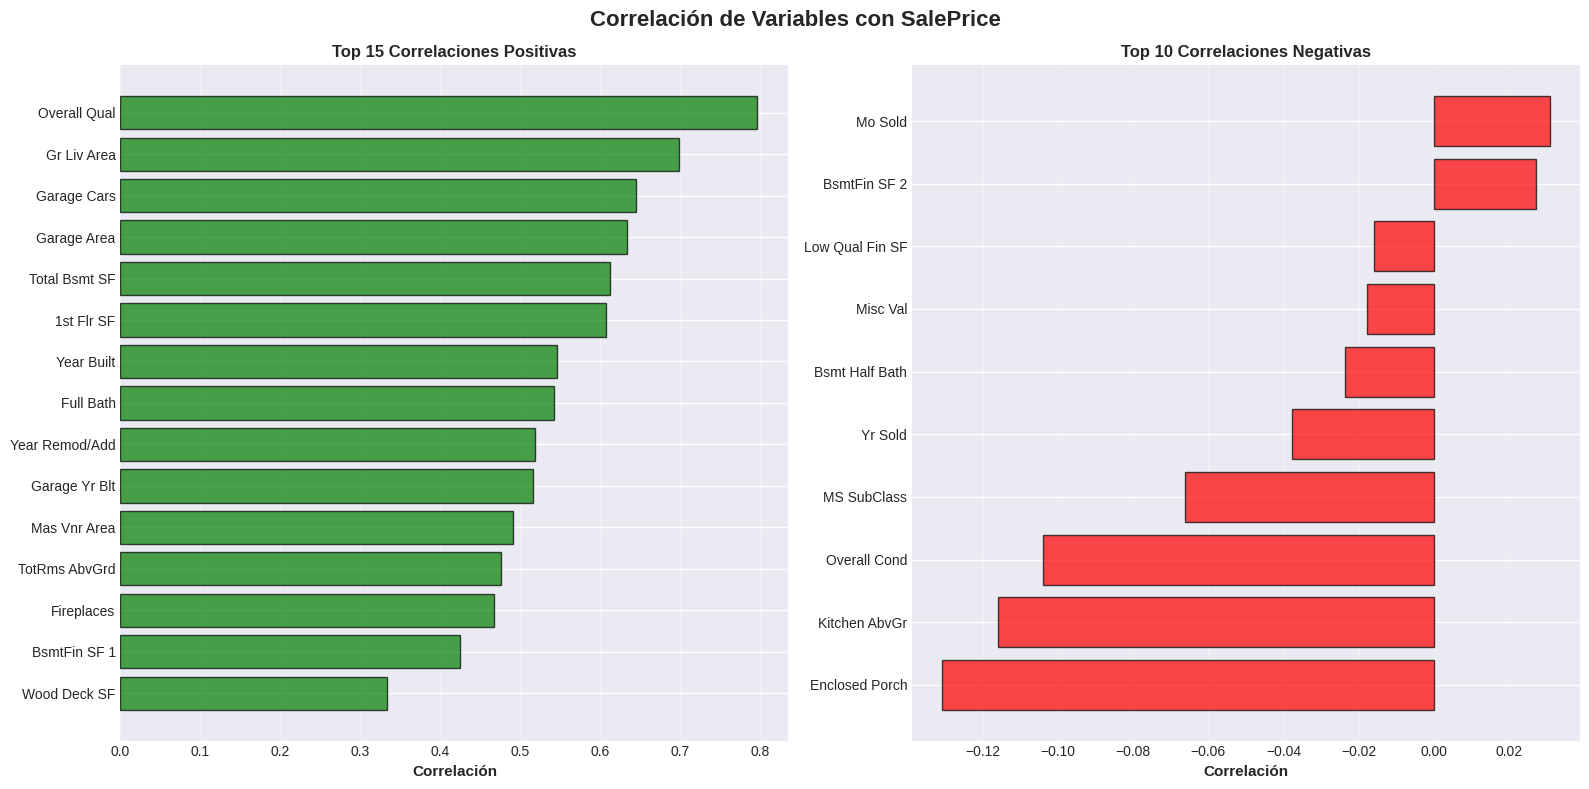

In [18]:
# Visualización de correlaciones con SalePrice
correlations_no_target = correlations.drop('SalePrice')

# Top 15 positivas y negativas
top_pos = correlations_no_target.head(15)
top_neg = correlations_no_target.tail(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Correlación de Variables con SalePrice', fontsize=16, fontweight='bold')

# Positivas
axes[0].barh(range(len(top_pos)), top_pos.values, color='green', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(top_pos)))
axes[0].set_yticklabels(top_pos.index, fontsize=10)
axes[0].set_xlabel('Correlación', fontsize=11, fontweight='bold')
axes[0].set_title('Top 15 Correlaciones Positivas', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Negativas
axes[1].barh(range(len(top_neg)), top_neg.values, color='red', edgecolor='black', alpha=0.7)
axes[1].set_yticks(range(len(top_neg)))
axes[1].set_yticklabels(top_neg.index, fontsize=10)
axes[1].set_xlabel('Correlación', fontsize=11, fontweight='bold')
axes[1].set_title('Top 10 Correlaciones Negativas', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

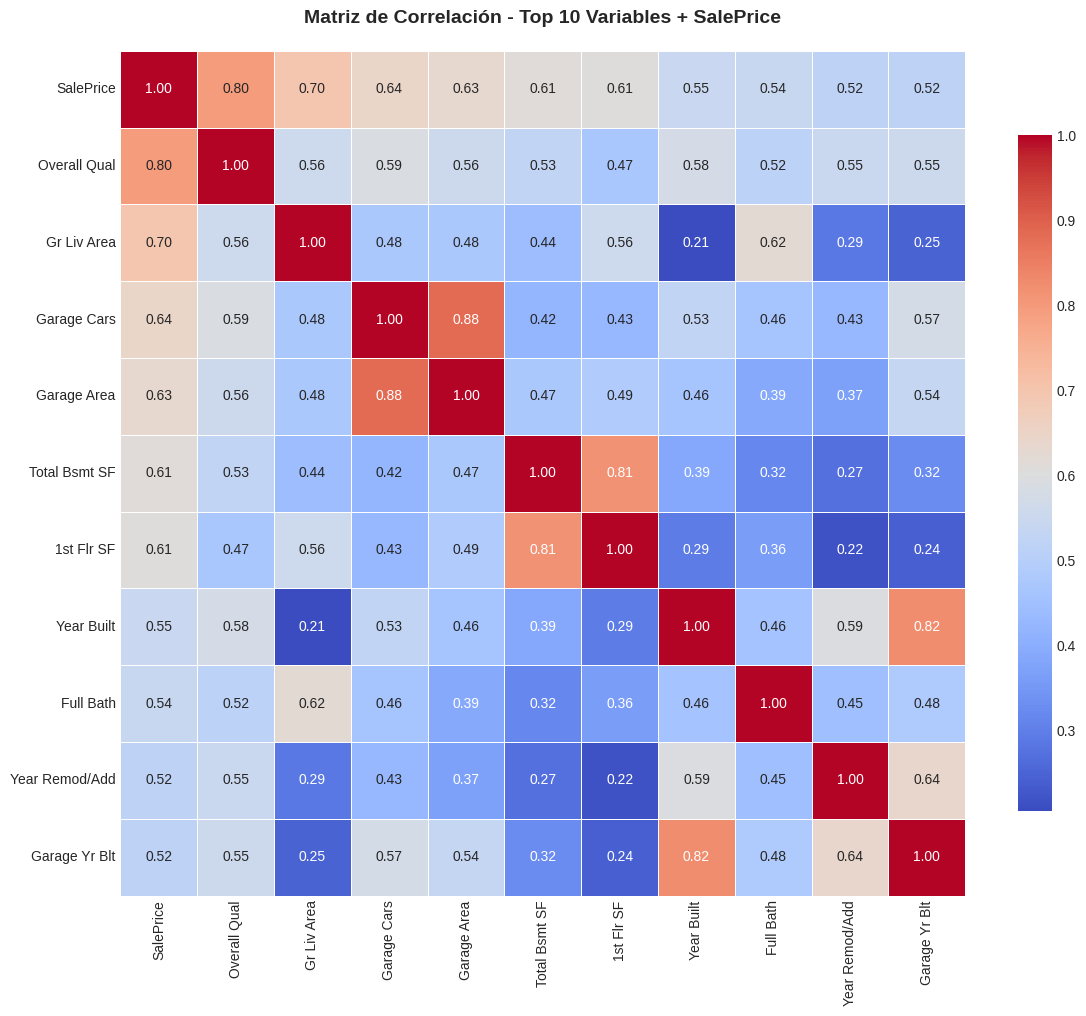

In [19]:
# Matriz de correlación de las variables más importantes
top_corr_features = correlations.head(11).index.tolist()  # Top 10 + SalePrice

plt.figure(figsize=(12, 10))
correlation_matrix = data_with_target[top_corr_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Top 10 Variables + SalePrice', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### 3.8 Detección de Outliers en Variables Numéricas Clave

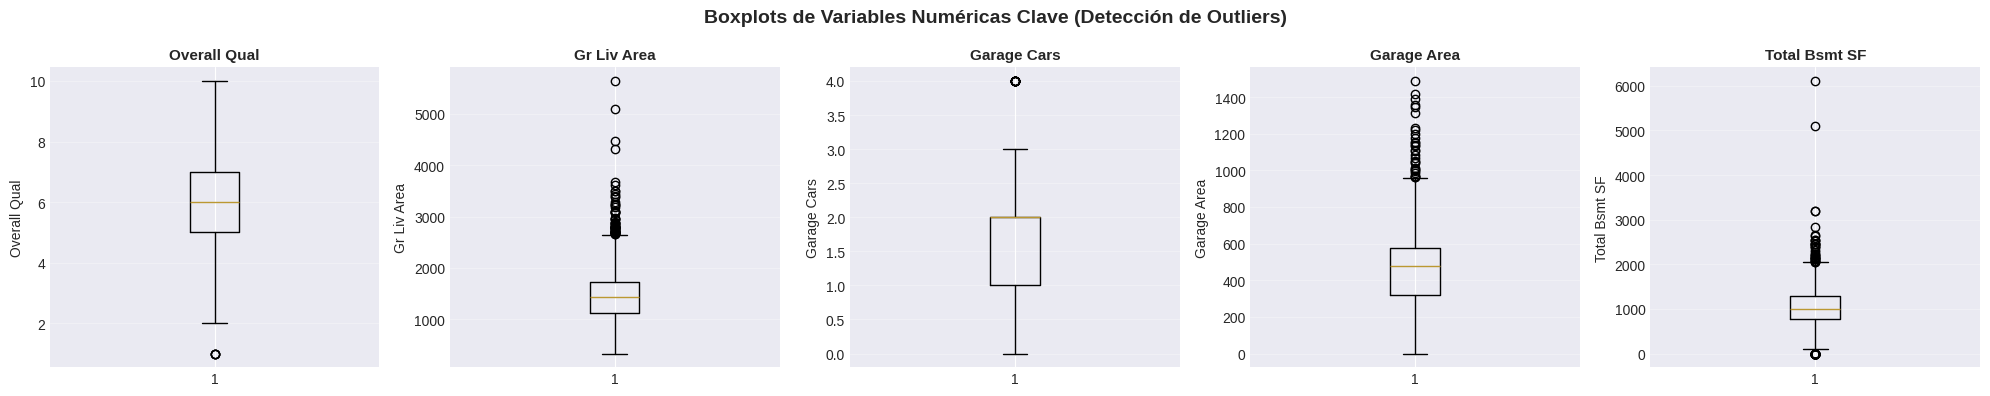


 Observación:
- Los outliers pueden ser valores legítimos o errores de medición
- Considerar si eliminarlos, transformarlos o mantenerlos según el contexto


In [20]:
# Seleccionar las variables más correlacionadas para análisis de outliers
top_numeric_vars = correlations.head(6).index.tolist()
if 'SalePrice' in top_numeric_vars:
    top_numeric_vars.remove('SalePrice')
top_numeric_vars = top_numeric_vars[:5]  # Top 5 variables numéricas

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('Boxplots de Variables Numéricas Clave (Detección de Outliers)', 
             fontsize=14, fontweight='bold')

for idx, col in enumerate(top_numeric_vars):
    axes[idx].boxplot(features[col].dropna(), vert=True)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n Observación:")
print("- Los outliers pueden ser valores legítimos o errores de medición")
print("- Considerar si eliminarlos, transformarlos o mantenerlos según el contexto")

## 4. Decisiones de Preprocesamiento

Basándonos en el análisis exploratorio, tomaremos decisiones sobre:
1. **Selección de variables**: ¿Qué variables eliminar?
2. **Valores faltantes**: ¿Cómo manejarlos?
3. **Variables categóricas**: ¿Cómo codificarlas?
4. **Escalamiento**: ¿Normalizar o estandarizar?

### 4.1 Selección de Variables

**Estrategia:**
- Eliminar variables con más del 80% de valores faltantes (son poco informativas)
- Evaluar si hay variables con varianza casi nula
- Considerar eliminar variables altamente correlacionadas entre sí (multicolinealidad)

In [21]:
# Variables a eliminar por exceso de valores faltantes (>80%)
high_missing_vars = missing_df[missing_df['Porcentaje'] > 80]['Variable'].tolist()

print("=" * 70)
print("SELECCIÓN DE VARIABLES - ELIMINACIÓN POR VALORES FALTANTES")
print("=" * 70)
print(f"\nVariables a eliminar (>80% faltantes): {len(high_missing_vars)}")
if high_missing_vars:
    for var in high_missing_vars:
        print(f"  • {var}")
else:
    print("  → No hay variables con más del 80% de valores faltantes")
print("\n" + "=" * 70)

SELECCIÓN DE VARIABLES - ELIMINACIÓN POR VALORES FALTANTES

Variables a eliminar (>80% faltantes): 3
  • Pool QC
  • Misc Feature
  • Alley



In [22]:
# Eliminar variables seleccionadas
features_clean = features.drop(columns=high_missing_vars, errors='ignore')

print(f"\n✓ Variables eliminadas: {len(high_missing_vars)}")
print(f"✓ Variables restantes: {features_clean.shape[1]}")
print(f"\nDimensiones del dataset limpio: {features_clean.shape}")


✓ Variables eliminadas: 3
✓ Variables restantes: 76

Dimensiones del dataset limpio: (2344, 76)


### 4.2 Manejo de Valores Faltantes

**Estrategia:**
- **Variables numéricas**: Imputar con la mediana (más robusta a outliers que la media)
- **Variables categóricas**: Imputar con la moda o crear categoría 'Missing' si tiene sentido semántico

In [23]:
# Actualizar listas de variables después de eliminación
numeric_features_clean = features_clean.select_dtypes(include=[np.number]).columns.tolist()
categorical_features_clean = features_clean.select_dtypes(include=['object']).columns.tolist()

print("Variables después de limpieza:")
print(f"  • Numéricas: {len(numeric_features_clean)}")
print(f"  • Categóricas: {len(categorical_features_clean)}")

Variables después de limpieza:
  • Numéricas: 36
  • Categóricas: 40


In [24]:
# Imputación de variables numéricas con la mediana
print("\n" + "=" * 70)
print("IMPUTACIÓN DE VALORES FALTANTES - VARIABLES NUMÉRICAS")
print("=" * 70)

numeric_missing = features_clean[numeric_features_clean].isnull().sum()
numeric_missing = numeric_missing[numeric_missing > 0]

if len(numeric_missing) > 0:
    print(f"\nVariables numéricas con valores faltantes: {len(numeric_missing)}")
    print("\nEstratega: Imputación con la MEDIANA (robusta a outliers)\n")
    
    numeric_imputer = SimpleImputer(strategy='median')
    features_clean[numeric_features_clean] = numeric_imputer.fit_transform(
        features_clean[numeric_features_clean]
    )
    
    for col in numeric_missing.index:
        print(f"  ✓ {col}: {numeric_missing[col]} valores imputados")
else:
    print("\n✓ No hay valores faltantes en variables numéricas")

print("\n" + "=" * 70)


IMPUTACIÓN DE VALORES FALTANTES - VARIABLES NUMÉRICAS

Variables numéricas con valores faltantes: 11

Estratega: Imputación con la MEDIANA (robusta a outliers)

  ✓ Lot Frontage: 393 valores imputados
  ✓ Mas Vnr Area: 19 valores imputados
  ✓ BsmtFin SF 1: 1 valores imputados
  ✓ BsmtFin SF 2: 1 valores imputados
  ✓ Bsmt Unf SF: 1 valores imputados
  ✓ Total Bsmt SF: 1 valores imputados
  ✓ Bsmt Full Bath: 1 valores imputados
  ✓ Bsmt Half Bath: 1 valores imputados
  ✓ Garage Yr Blt: 122 valores imputados
  ✓ Garage Cars: 1 valores imputados
  ✓ Garage Area: 1 valores imputados



In [25]:
# Imputación de variables categóricas con la moda
print("\n" + "=" * 70)
print("IMPUTACIÓN DE VALORES FALTANTES - VARIABLES CATEGÓRICAS")
print("=" * 70)

categorical_missing = features_clean[categorical_features_clean].isnull().sum()
categorical_missing = categorical_missing[categorical_missing > 0]

if len(categorical_missing) > 0:
    print(f"\nVariables categóricas con valores faltantes: {len(categorical_missing)}")
    print("\nEstrategia: Imputación con la MODA (valor más frecuente)\n")
    
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    features_clean[categorical_features_clean] = categorical_imputer.fit_transform(
        features_clean[categorical_features_clean]
    )
    
    for col in categorical_missing.index:
        print(f"  ✓ {col}: {categorical_missing[col]} valores imputados")
else:
    print("\n✓ No hay valores faltantes en variables categóricas")

print("\n" + "=" * 70)


IMPUTACIÓN DE VALORES FALTANTES - VARIABLES CATEGÓRICAS

Variables categóricas con valores faltantes: 12

Estrategia: Imputación con la MODA (valor más frecuente)

  ✓ Mas Vnr Type: 1426 valores imputados
  ✓ Bsmt Qual: 61 valores imputados
  ✓ Bsmt Cond: 61 valores imputados
  ✓ Bsmt Exposure: 63 valores imputados
  ✓ BsmtFin Type 1: 61 valores imputados
  ✓ BsmtFin Type 2: 62 valores imputados
  ✓ Fireplace Qu: 1144 valores imputados
  ✓ Garage Type: 120 valores imputados
  ✓ Garage Finish: 122 valores imputados
  ✓ Garage Qual: 122 valores imputados
  ✓ Garage Cond: 122 valores imputados
  ✓ Fence: 1874 valores imputados



In [26]:
# Verificar que no queden valores faltantes
remaining_missing = features_clean.isnull().sum().sum()

print("\n" + "=" * 70)
print("VERIFICACIÓN FINAL DE VALORES FALTANTES")
print("=" * 70)
print(f"\nTotal de valores faltantes restantes: {remaining_missing}")

if remaining_missing == 0:
    print("\n ÉXITO: No quedan valores faltantes en el dataset")
else:
    print("\n⚠ ADVERTENCIA: Aún quedan valores faltantes por resolver")
    print(features_clean.isnull().sum()[features_clean.isnull().sum() > 0])

print("\n" + "=" * 70)


VERIFICACIÓN FINAL DE VALORES FALTANTES

Total de valores faltantes restantes: 0

 ÉXITO: No quedan valores faltantes en el dataset



### 4.3 Codificación de Variables Categóricas

**Estrategias:**
- **One-Hot Encoding**: Para variables nominales (sin orden) con pocas categorías (<10)
- **Label Encoding**: Para variables con muchas categorías o variables ordinales
- **Target Encoding**: Alternativa avanzada (mapear categorías según promedio del target)

In [27]:
# Analizar cardinalidad para decidir estrategia de encoding
cardinality = {col: features_clean[col].nunique() for col in categorical_features_clean}
cardinality_df = pd.DataFrame({
    'Variable': list(cardinality.keys()),
    'Categorias_Unicas': list(cardinality.values())
}).sort_values('Categorias_Unicas', ascending=False)

print("Cardinalidad de variables categóricas:\n")
print(cardinality_df.to_string(index=False))

# Separar en variables de baja y alta cardinalidad
low_cardinality = cardinality_df[cardinality_df['Categorias_Unicas'] <= 10]['Variable'].tolist()
high_cardinality = cardinality_df[cardinality_df['Categorias_Unicas'] > 10]['Variable'].tolist()

print(f"\n{'='*70}")
print(f"Variables de baja cardinalidad (≤10 categorías): {len(low_cardinality)}")
print(f"Variables de alta cardinalidad (>10 categorías): {len(high_cardinality)}")
print(f"{'='*70}")

Cardinalidad de variables categóricas:

      Variable  Categorias_Unicas
  Neighborhood                 28
  Exterior 1st                 16
  Exterior 2nd                 16
     Sale Type                 10
   Condition 1                  9
    Functional                  8
   House Style                  8
     Roof Matl                  8
   Condition 2                  8
     MS Zoning                  7
BsmtFin Type 1                  6
       Heating                  6
BsmtFin Type 2                  6
    Foundation                  6
Sale Condition                  6
   Garage Type                  6
    Roof Style                  6
   Garage Qual                  5
   Garage Cond                  5
     Bsmt Cond                  5
    Exter Cond                  5
    Lot Config                  5
    Electrical                  5
     Bldg Type                  5
  Fireplace Qu                  5
     Bsmt Qual                  5
    Heating QC                  5
 Bsmt Ex

#### 4.3.1 Variables Ordinales (Encoding Manual)

Algunas variables categóricas tienen un orden inherente. Por ejemplo, variables de calidad pueden seguir un orden: Po < Fa < TA < Gd < Ex

In [28]:
# Definir variables ordinales y sus mapeos (AJUSTAR SEGÚN TU DATASET)
# Ejemplo de mapeos comunes en el dataset de Ames Housing:
# po = poor , fa = fair , ta = typical , gd = good , ex = excellent
# gtl = gentle, mod = moderate, sev = severe

ordinal_mappings = {
    # Calidad (Quality): Po < Fa < TA < Gd < Ex
    'Exter Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Exter Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Bsmt Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Heating QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Kitchen Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Fireplace Qu': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Qual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Garage Cond': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'Pool QC': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    
    # Pendiente (Slope): Gtl < Mod < Sev
    'Land Slope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    
    # Exposición del sótano: No < Mn < Av < Gd
    'Bsmt Exposure': {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    
    # Tipo de terminado del sótano
    'BsmtFin Type 1': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFin Type 2': {'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    
    # Terminado del garaje
    'Garage Finish': {'Unf': 1, 'RFn': 2, 'Fin': 3},
    
    # Funcionalidad
    'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    
    # Cercas
    'Fence': {'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
    
    # Pavimento
    'Paved Drive': {'N': 0, 'P': 1, 'Y': 2},
}

print("=" * 70)
print("ENCODING DE VARIABLES ORDINALES")
print("=" * 70)
print("\nNOTA: Ajustar los mapeos según las variables específicas de tu dataset")
print("\nMapeos definidos:")

if ordinal_mappings:
    for var, mapping in ordinal_mappings.items():
        if var in features_clean.columns:
            print(f"\n• {var}: {mapping}")
            features_clean[var] = features_clean[var].map(mapping)
            print(f"  ✓ Codificada exitosamente")
            
            # Mover a lista de numéricas y quitar de categóricas
            if var in categorical_features_clean:
                categorical_features_clean.remove(var)
                numeric_features_clean.append(var)
else:
    print("\n→ No se definieron variables ordinales para codificar")
    print("  Si tu dataset tiene variables ordinales, agrégalas al diccionario ordinal_mappings")

print("\n" + "=" * 70)

ENCODING DE VARIABLES ORDINALES

NOTA: Ajustar los mapeos según las variables específicas de tu dataset

Mapeos definidos:

• Exter Qual: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Exter Cond: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Bsmt Qual: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Bsmt Cond: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Heating QC: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Kitchen Qual: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Fireplace Qu: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Garage Qual: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Garage Cond: {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
  ✓ Codificada exitosamente

• Land Slope: {'Gtl': 1, 'Mod': 2, 'Sev': 3}
  ✓ Codificada exitosament

#### 4.3.2 One-Hot Encoding para Variables de Baja Cardinalidad

In [29]:
# Aplicar One-Hot Encoding a variables de baja cardinalidad
print("=" * 70)
print("ONE-HOT ENCODING - VARIABLES DE BAJA CARDINALIDAD")
print("=" * 70)

# Filtrar solo las que todavía están en categorical_features_clean
low_cardinality_to_encode = [col for col in low_cardinality if col in categorical_features_clean]

if low_cardinality_to_encode:
    print(f"\nVariables a codificar con One-Hot Encoding: {len(low_cardinality_to_encode)}\n")
    
    for col in low_cardinality_to_encode:
        print(f"  • {col} ({features_clean[col].nunique()} categorías)")
    
    # Aplicar One-Hot Encoding
    features_encoded = pd.get_dummies(
        features_clean, 
        columns=low_cardinality_to_encode,
        prefix=low_cardinality_to_encode,
        drop_first=True  # Evitar multicolinealidad perfecta
    )
    
    print(f"\n✓ One-Hot Encoding aplicado")
    print(f"  Columnas originales: {features_clean.shape[1]}")
    print(f"  Columnas después de encoding: {features_encoded.shape[1]}")
    print(f"  Nuevas columnas creadas: {features_encoded.shape[1] - features_clean.shape[1] + len(low_cardinality_to_encode)}")
    
    features_clean = features_encoded
else:
    print("\n→ No hay variables de baja cardinalidad para codificar")

print("\n" + "=" * 70)

ONE-HOT ENCODING - VARIABLES DE BAJA CARDINALIDAD

Variables a codificar con One-Hot Encoding: 20

  • Sale Type (10 categorías)
  • Condition 1 (9 categorías)
  • House Style (8 categorías)
  • Roof Matl (8 categorías)
  • Condition 2 (8 categorías)
  • MS Zoning (7 categorías)
  • Heating (6 categorías)
  • Foundation (6 categorías)
  • Sale Condition (6 categorías)
  • Garage Type (6 categorías)
  • Roof Style (6 categorías)
  • Lot Config (5 categorías)
  • Electrical (5 categorías)
  • Bldg Type (5 categorías)
  • Lot Shape (4 categorías)
  • Mas Vnr Type (4 categorías)
  • Land Contour (4 categorías)
  • Utilities (3 categorías)
  • Street (2 categorías)
  • Central Air (2 categorías)

✓ One-Hot Encoding aplicado
  Columnas originales: 76
  Columnas después de encoding: 150
  Nuevas columnas creadas: 94



#### 4.3.3 Label Encoding para Variables de Alta Cardinalidad

In [30]:
# Aplicar Label Encoding a variables de alta cardinalidad
print("=" * 70)
print("LABEL ENCODING - VARIABLES DE ALTA CARDINALIDAD")
print("=" * 70)

# Actualizar lista de categóricas restantes
remaining_categorical = features_clean.select_dtypes(include=['object']).columns.tolist()

if remaining_categorical:
    print(f"\nVariables a codificar con Label Encoding: {len(remaining_categorical)}\n")
    
    label_encoders = {}
    
    for col in remaining_categorical:
        le = LabelEncoder()
        features_clean[col] = le.fit_transform(features_clean[col].astype(str))
        label_encoders[col] = le
        print(f"  ✓ {col}: {len(le.classes_)} categorías codificadas")
    
    print(f"\n✓ Label Encoding aplicado a {len(remaining_categorical)} variables")
else:
    print("\n→ No hay variables categóricas restantes para codificar")
    label_encoders = {}

print("\n" + "=" * 70)

LABEL ENCODING - VARIABLES DE ALTA CARDINALIDAD

Variables a codificar con Label Encoding: 3

  ✓ Neighborhood: 28 categorías codificadas
  ✓ Exterior 1st: 16 categorías codificadas
  ✓ Exterior 2nd: 16 categorías codificadas

✓ Label Encoding aplicado a 3 variables



In [31]:
# Verificar que no queden variables categóricas sin codificar
remaining_object_cols = features_clean.select_dtypes(include=['object']).columns.tolist()

print("\nVERIFICACIÓN: Variables categóricas sin codificar:", len(remaining_object_cols))

if len(remaining_object_cols) == 0:
    print("✓ ✓ ✓ ÉXITO: Todas las variables categóricas han sido codificadas")
else:
    print("⚠ ADVERTENCIA: Quedan variables categóricas sin codificar:")
    print(remaining_object_cols)


VERIFICACIÓN: Variables categóricas sin codificar: 0
✓ ✓ ✓ ÉXITO: Todas las variables categóricas han sido codificadas


### 4.4 Escalamiento de Variables

**Justificación:**
- **StandardScaler** (estandarización): Transforma las variables a media=0 y desviación=1
- Necesario para algoritmos sensibles a la escala: Regresión Lineal, SVM, KNN, Redes Neuronales
- NO necesario para: Árboles de decisión, Random Forest, XGBoost

**Decisión:** Aplicaremos StandardScaler para tener flexibilidad en la elección de algoritmos

In [32]:
print("=" * 70)
print("ESCALAMIENTO DE VARIABLES")
print("=" * 70)
print("\nEstrategia: StandardScaler (media=0, desviación estándar=1)")
print("\nRazón: Permite usar algoritmos sensibles a la escala")
print("\nNOTA: El escalamiento se aplicará DESPUÉS de la separación train/validation")
print("      para evitar data leakage (filtración de información del validation al train)")
print("\n" + "=" * 70)

ESCALAMIENTO DE VARIABLES

Estrategia: StandardScaler (media=0, desviación estándar=1)

Razón: Permite usar algoritmos sensibles a la escala

NOTA: El escalamiento se aplicará DESPUÉS de la separación train/validation
      para evitar data leakage (filtración de información del validation al train)



## 5. Separación de Datos: Train y Validation

**Estrategia:**
- 80% para entrenamiento
- 20% para validación
- `random_state=42` para reproducibilidad

In [33]:
# Separar features y target
X = features_clean
y = target['SalePrice']

# Verificar que las dimensiones coincidan
assert X.shape[0] == y.shape[0], "El número de filas no coincide entre X e y"

print(f"Dimensiones finales antes de separación:")
print(f"  X (features): {X.shape}")
print(f"  y (target):   {y.shape}")

Dimensiones finales antes de separación:
  X (features): (2344, 150)
  y (target):   (2344,)


In [34]:
# Separación train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,          # 20% para validación
    random_state=RANDOM_STATE  # Para reproducibilidad
)

print("=" * 70)
print("SEPARACIÓN DE DATOS COMPLETADA")
print("=" * 70)
print(f"\nConjunto de ENTRENAMIENTO:")
print(f"  X_train: {X_train.shape} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  y_train: {y_train.shape}")

print(f"\nConjunto de VALIDACIÓN:")
print(f"  X_val: {X_val.shape} ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  y_val: {y_val.shape}")

print(f"\nTotal de variables (features): {X_train.shape[1]}")
print("\n" + "=" * 70)

SEPARACIÓN DE DATOS COMPLETADA

Conjunto de ENTRENAMIENTO:
  X_train: (1875, 150) (80.0%)
  y_train: (1875,)

Conjunto de VALIDACIÓN:
  X_val: (469, 150) (20.0%)
  y_val: (469,)

Total de variables (features): 150



### 5.1 Aplicar Escalamiento (solo en datos numéricos)

In [35]:
# Aplicar StandardScaler
# IMPORTANTE: Ajustar (fit) solo con X_train para evitar data leakage

print("=" * 70)
print("APLICANDO STANDARDSCALER")
print("=" * 70)

scaler = StandardScaler()

# Fit solo con train, transform en ambos
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convertir de vuelta a DataFrames para mantener nombres de columnas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

print("\n✓ Escalamiento aplicado correctamente")
print(f"  • Scaler ajustado (fit) con X_train")
print(f"  • Transformación aplicada a X_train y X_val")
print(f"\nEstadísticas de X_train después del escalamiento:")
print(f"  • Media: ~{X_train_scaled.mean().mean():.2e} (esperado: ~0)")
print(f"  • Desviación estándar: ~{X_train_scaled.std().mean():.2f} (esperado: ~1)")
print("\n" + "=" * 70)

APLICANDO STANDARDSCALER

✓ Escalamiento aplicado correctamente
  • Scaler ajustado (fit) con X_train
  • Transformación aplicada a X_train y X_val

Estadísticas de X_train después del escalamiento:
  • Media: ~4.52e-16 (esperado: ~0)
  • Desviación estándar: ~0.97 (esperado: ~1)



## 6. Guardar Datos Preprocesados y Objetos

Guardamos todo lo necesario para entrenar los modelos y para poder aplicar las mismas transformaciones al test set.

In [36]:
# Guardar los conjuntos de datos preprocesados
print("=" * 70)
print("GUARDANDO DATOS PREPROCESADOS")
print("=" * 70)

# Guardar como CSV (opcional, para inspección)
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_val_scaled.to_csv('X_val_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

print("\n✓ Datos guardados como CSV:")
print("  • X_train_scaled.csv")
print("  • X_val_scaled.csv")
print("  • y_train.csv")
print("  • y_val.csv")

GUARDANDO DATOS PREPROCESADOS

✓ Datos guardados como CSV:
  • X_train_scaled.csv
  • X_val_scaled.csv
  • y_train.csv
  • y_val.csv


In [37]:
# Guardar objetos de preprocesamiento con pickle
# Estos son CRUCIALES para aplicar las mismas transformaciones al test set

preprocessing_objects = {
    'scaler': scaler,
    'label_encoders': label_encoders,
    'numeric_imputer': numeric_imputer if len(numeric_missing) > 0 else None,
    'categorical_imputer': categorical_imputer if len(categorical_missing) > 0 else None,
    'feature_names': X_train_scaled.columns.tolist(),
    'removed_columns': high_missing_vars,
    'ordinal_mappings': ordinal_mappings
}

with open('preprocessing_objects.pkl', 'wb') as f:
    pickle.dump(preprocessing_objects, f)

print("\n✓ Objetos de preprocesamiento guardados:")
print("  • preprocessing_objects.pkl")
print("\n  Contiene:")
print("    - StandardScaler ajustado")
print("    - Label Encoders de variables categóricas")
print("    - Imputadores (si aplica)")
print("    - Nombres de features finales")
print("    - Columnas eliminadas")
print("    - Mapeos ordinales")

print("\n" + "=" * 70)


✓ Objetos de preprocesamiento guardados:
  • preprocessing_objects.pkl

  Contiene:
    - StandardScaler ajustado
    - Label Encoders de variables categóricas
    - Imputadores (si aplica)
    - Nombres de features finales
    - Columnas eliminadas
    - Mapeos ordinales



## 7. Resumen del Preprocesamiento

In [38]:
print("\n" + "=" * 80)
print("RESUMEN COMPLETO DEL PREPROCESAMIENTO")
print("=" * 80)

print("\n1. CARGA DE DATOS")
print(f"   • Dataset original: {features.shape[0]} instancias × {features.shape[1]} variables")

print("\n2. SELECCIÓN DE VARIABLES")
print(f"   • Variables eliminadas (>80% faltantes): {len(high_missing_vars)}")
print(f"   • Variables restantes: {features_clean.shape[1]}")

print("\n3. MANEJO DE VALORES FALTANTES")
print(f"   • Variables numéricas imputadas: {len(numeric_missing) if len(numeric_missing) > 0 else 0}")
print(f"   • Variables categóricas imputadas: {len(categorical_missing) if len(categorical_missing) > 0 else 0}")
print(f"   • Estrategia: Mediana (numéricas), Moda (categóricas)")

print("\n4. CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print(f"   • Variables ordinales codificadas manualmente: {len(ordinal_mappings)}")
print(f"   • Variables con One-Hot Encoding: {len(low_cardinality_to_encode) if low_cardinality_to_encode else 0}")
print(f"   • Variables con Label Encoding: {len(label_encoders)}")

print("\n5. ESCALAMIENTO")
print(f"   • Método: StandardScaler")
print(f"   • Aplicado a todas las {X_train_scaled.shape[1]} variables")

print("\n6. SEPARACIÓN DE DATOS")
print(f"   • Train: {X_train.shape[0]} instancias ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Validation: {X_val.shape[0]} instancias ({X_val.shape[0]/len(X)*100:.1f}%)")

print("\n7. DIMENSIONES FINALES")
print(f"   • Features finales: {X_train_scaled.shape[1]}")
print(f"   • X_train: {X_train_scaled.shape}")
print(f"   • X_val: {X_val_scaled.shape}")

print("\n8. ARCHIVOS GENERADOS")
print("   X_train_scaled.csv")
print("   X_val_scaled.csv")
print("   y_train.csv")
print("   y_val.csv")
print("   preprocessing_objects.pkl")




RESUMEN COMPLETO DEL PREPROCESAMIENTO

1. CARGA DE DATOS
   • Dataset original: 2344 instancias × 79 variables

2. SELECCIÓN DE VARIABLES
   • Variables eliminadas (>80% faltantes): 3
   • Variables restantes: 150

3. MANEJO DE VALORES FALTANTES
   • Variables numéricas imputadas: 11
   • Variables categóricas imputadas: 12
   • Estrategia: Mediana (numéricas), Moda (categóricas)

4. CODIFICACIÓN DE VARIABLES CATEGÓRICAS
   • Variables ordinales codificadas manualmente: 18
   • Variables con One-Hot Encoding: 20
   • Variables con Label Encoding: 3

5. ESCALAMIENTO
   • Método: StandardScaler
   • Aplicado a todas las 150 variables

6. SEPARACIÓN DE DATOS
   • Train: 1875 instancias (80.0%)
   • Validation: 469 instancias (20.0%)

7. DIMENSIONES FINALES
   • Features finales: 150
   • X_train: (1875, 150)
   • X_val: (469, 150)

8. ARCHIVOS GENERADOS
   X_train_scaled.csv
   X_val_scaled.csv
   y_train.csv
   y_val.csv
   preprocessing_objects.pkl


## 8. Función para Preprocesar el Test Set

Esta función aplicará todas las transformaciones al test set el día de la presentación.

In [39]:
def preprocess_test_set(test_features_path, preprocessing_objects_path='preprocessing_objects.pkl'):
    """
    Aplica las mismas transformaciones del training set al test set.
    
    Parameters:
    -----------
    test_features_path : str
        Ruta al archivo CSV con las features del test set
    preprocessing_objects_path : str
        Ruta al archivo pickle con los objetos de preprocesamiento
    
    Returns:
    --------
    X_test_scaled : DataFrame
        Test set preprocesado y escalado, listo para predicciones
    """
    
    print("=" * 70)
    print("PREPROCESANDO TEST SET")
    print("=" * 70)
    
    # Cargar test set
    test_features = pd.read_csv(test_features_path)
    print(f"\n✓ Test set cargado: {test_features.shape}")
    
    # Cargar objetos de preprocesamiento
    with open(preprocessing_objects_path, 'rb') as f:
        prep_objects = pickle.load(f)
    
    scaler = prep_objects['scaler']
    label_encoders = prep_objects['label_encoders']
    numeric_imputer = prep_objects['numeric_imputer']
    categorical_imputer = prep_objects['categorical_imputer']
    removed_columns = prep_objects['removed_columns']
    ordinal_mappings = prep_objects['ordinal_mappings']
    final_features = prep_objects['feature_names']
    
    print(" Objetos de preprocesamiento cargados")
    
    # 1. Eliminar columnas que se eliminaron en train
    test_features = test_features.drop(columns=removed_columns, errors='ignore')
    print(f"\n1. Columnas eliminadas: {len(removed_columns)}")
    
    # 2. Identificar tipos de variables
    numeric_cols = test_features.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = test_features.select_dtypes(include=['object']).columns.tolist()
    
    # 3. Imputar valores faltantes
    if numeric_imputer is not None and len(numeric_cols) > 0:
        test_features[numeric_cols] = numeric_imputer.transform(test_features[numeric_cols])
        print("2. Imputación numérica aplicada")
    
    if categorical_imputer is not None and len(categorical_cols) > 0:
        test_features[categorical_cols] = categorical_imputer.transform(test_features[categorical_cols])
        print("3. Imputación categórica aplicada")
    
    # 4. Aplicar mapeos ordinales
    for var, mapping in ordinal_mappings.items():
        if var in test_features.columns:
            test_features[var] = test_features[var].map(mapping)
            if var in categorical_cols:
                categorical_cols.remove(var)
    
    if ordinal_mappings:
        print(f"4. Mapeos ordinales aplicados: {len(ordinal_mappings)}")
    
    # 5. One-Hot Encoding (aplicar a las mismas variables que en train)
    # Actualizar categorical_cols después de ordinales
    categorical_cols = test_features.select_dtypes(include=['object']).columns.tolist()
    
    # Determinar cuáles variables se codificaron con one-hot en train
    # (las de baja cardinalidad que no fueron label-encoded)
    one_hot_vars = [col for col in categorical_cols 
                    if col not in label_encoders and test_features[col].nunique() <= 10]
    
    if one_hot_vars:
        test_features = pd.get_dummies(
            test_features,
            columns=one_hot_vars,
            prefix=one_hot_vars,
            drop_first=True
        )
        print(f"5. One-Hot Encoding aplicado: {len(one_hot_vars)} variables")
    
    # 6. Label Encoding
    for col, encoder in label_encoders.items():
        if col in test_features.columns:
            # Manejar categorías no vistas
            test_features[col] = test_features[col].astype(str)
            test_features[col] = test_features[col].apply(
                lambda x: x if x in encoder.classes_ else encoder.classes_[0]
            )
            test_features[col] = encoder.transform(test_features[col])
    
    if label_encoders:
        print(f"6. Label Encoding aplicado: {len(label_encoders)} variables")
    
    # 7. Asegurar que test tiene las mismas columnas que train (en el mismo orden)
    # Agregar columnas faltantes con 0
    for col in final_features:
        if col not in test_features.columns:
            test_features[col] = 0
    
    # Remover columnas extra
    test_features = test_features[final_features]
    print(f"7. Columnas alineadas con train: {len(final_features)}")
    
    # 8. Aplicar escalamiento
    X_test_scaled = scaler.transform(test_features)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=final_features)
    print("8. StandardScaler aplicado")
    
    print("\n" + "=" * 70)
    print(f"✓ ✓ ✓ TEST SET PREPROCESADO: {X_test_scaled.shape}")
    print("=" * 70)
    
    return X_test_scaled

print("\n✓ Función preprocess_test_set() definida")
print("\nUso el día de la presentación:")
print("  X_test_scaled = preprocess_test_set('testing_features.csv')")


✓ Función preprocess_test_set() definida

Uso el día de la presentación:
  X_test_scaled = preprocess_test_set('testing_features.csv')


# 6. ENTRENAMIENTO Y COMPARACIÓN DE MODELOS DE REGRESIÓN

A partir de este punto comenzamos la fase de modelado.
El dataset ya ha sido:
    - Limpio (sin valores faltantes)
    - Codificado (ordinal + one-hot + label encoding)
    - Escalado (StandardScaler aplicado correctamente)
    - Separado en Training y Validation

Objetivo de esta sección:
    1. Entrenar al menos dos modelos de regresión.
    2. Evaluarlos utilizando MSE y RMSE.
    3. Comparar su desempeño en el validation set.
    4. Seleccionar el mejor modelo para competir el día de la presentación.

Nota: La evaluación se realizará exclusivamente sobre el validation set.

## Entrenar regresión lineal

In [40]:
# Crear modelo
lin_reg = LinearRegression()

# Entrenar
lin_reg.fit(X_train_scaled, y_train)

# Predecir en validation
y_pred_lin = lin_reg.predict(X_val_scaled)

# Calcular MSE
mse_lin = mean_squared_error(y_val, y_pred_lin)
rmse_lin = np.sqrt(mse_lin)

print("RESULTADOS - REGRESIÓN LINEAL")
print("MSE:", mse_lin)
print("RMSE:", rmse_lin)

RESULTADOS - REGRESIÓN LINEAL
MSE: 1014940780.4493704
RMSE: 31858.1352318269


## Entrenar Random Forest

In [41]:

# Crear modelo
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Entrenar
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_val)

# Calcular métricas
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("RESULTADOS - RANDOM FOREST")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)

RESULTADOS - RANDOM FOREST
MSE: 407467866.4878923
RMSE: 20185.83331170384


In [42]:
# ============================================
# Random Forest con transformación logarítmica
# ============================================

# Transformar y_train
y_train_log = np.log(y_train)

# Crear modelo
rf_log = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

# Entrenar con target transformado
rf_log.fit(X_train, y_train_log)

# Predecir (en log)
y_pred_log = rf_log.predict(X_val)

# Regresar a escala original
y_pred_rf_log = np.exp(y_pred_log)

# Calcular métricas reales
mse_rf_log = mean_squared_error(y_val, y_pred_rf_log)
rmse_rf_log = np.sqrt(mse_rf_log)

print("RESULTADOS - RANDOM FOREST (con log target)")
print("MSE:", mse_rf_log)
print("RMSE:", rmse_rf_log)

# ============================================
# EXPERIMENTO: Transformación logarítmica del target
# Conclusión: No mejora el RMSE para Random Forest
# Se mantiene modelo sin log como mejor opción
# ============================================

RESULTADOS - RANDOM FOREST (con log target)
MSE: 421791009.4861304
RMSE: 20537.5512047111


In [43]:
# ============================================
# Random Forest Optimizado
# ============================================

rf_opt = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_opt.fit(X_train, y_train)

y_pred_opt = rf_opt.predict(X_val)

mse_opt = mean_squared_error(y_val, y_pred_opt)
rmse_opt = np.sqrt(mse_opt)

print("RESULTADOS - RANDOM FOREST OPTIMIZADO")
print("MSE:", mse_opt)
print("RMSE:", rmse_opt)

RESULTADOS - RANDOM FOREST OPTIMIZADO
MSE: 382895460.9645582
RMSE: 19567.7147609157


## Entrenar Gradient Boosting

In [44]:
gb = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)

mse_gb = mean_squared_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("RESULTADOS - GRADIENT BOOSTING")
print("MSE:", mse_gb)
print("RMSE:", rmse_gb)

RESULTADOS - GRADIENT BOOSTING
MSE: 380286167.3628979
RMSE: 19500.927346228895


## Entrenar XGBoost Regressor

In [45]:
xgb_model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("RESULTADOS - XGBOOST")
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)

RESULTADOS - XGBOOST
MSE: 334746080.0
RMSE: 18296.067336998953


In [46]:
# ===============================================================
# XGBOOST - AJUSTE FINO (TUNED)
# ===============================================================

xgb_tuned = XGBRegressor(
    n_estimators=1500,          # Más árboles
    learning_rate=0.02,         # Más conservador
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,              # Regularización L1
    reg_lambda=1.5,             # Regularización L2
    random_state=42,
    n_jobs=-1
)

xgb_tuned.fit(X_train, y_train)

y_pred_tuned = xgb_tuned.predict(X_val)

mse_tuned = mean_squared_error(y_val, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)

print("RESULTADOS - XGBOOST TUNED")
print("MSE:", mse_tuned)
print("RMSE:", rmse_tuned)

RESULTADOS - XGBOOST TUNED
MSE: 321500672.0
RMSE: 17930.439816133905


In [47]:
# ===============================================================
# TABLA COMPARATIVA COMPLETA DE MODELOS
# ===============================================================

results = pd.DataFrame({
    "Modelo": [
        "Regresión Lineal",
        "Random Forest (Optimizado)",
        "Gradient Boosting",
        "XGBoost Base",
        "XGBoost Tuned"
    ],
    "Variable_Notebook": [
        "lin_reg",
        "rf_opt",
        "gb",
        "xgb_model",
        "xgb_tuned"
    ],
    "RMSE": [
        rmse_lin,
        rmse_opt,
        rmse_gb,
        rmse_xgb,
        rmse_tuned
    ]
})

# Ordenar de mejor a peor
results = results.sort_values(by="RMSE").reset_index(drop=True)

results

,Modelo,Variable_Notebook,RMSE
0,XGBoost Tuned,xgb_tuned,17930.439816
1,XGBoost Base,xgb_model,18296.067337
2,Gradient Boosting,gb,19500.927346
3,Random Forest (Optimizado),rf_opt,19567.714761
4,Regresión Lineal,lin_reg,31858.135232


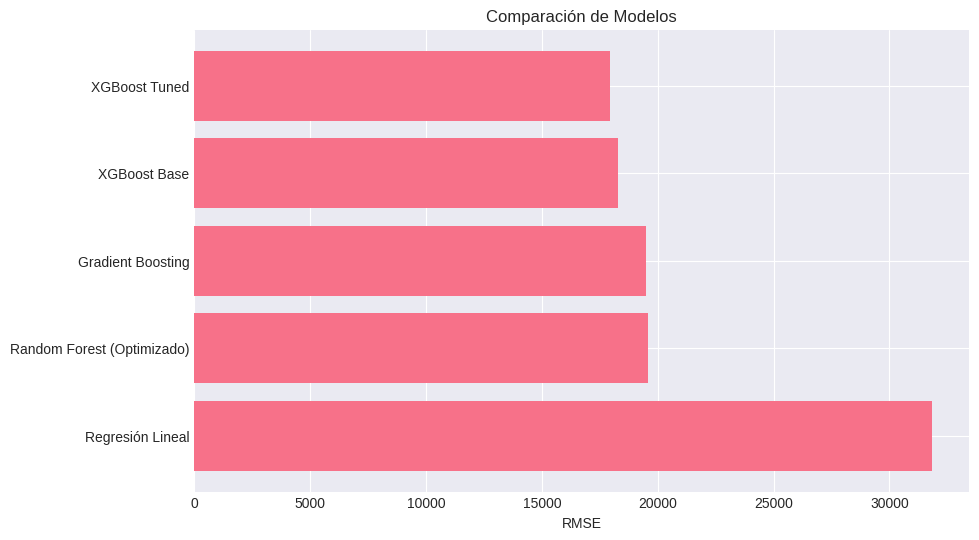

In [48]:
plt.figure(figsize=(10,6))
plt.barh(results["Modelo"], results["RMSE"])
plt.xlabel("RMSE")
plt.title("Comparación de Modelos")
plt.gca().invert_yaxis()
plt.show()

# Exportar modelo final

In [49]:
# Guardar modelo optimizado
with open('modelo_final.pkl', 'wb') as f:
    pickle.dump(xgb_tuned, f)

print("✓ Modelo final guardado como 'modelo_final.pkl'")

✓ Modelo final guardado como 'modelo_final.pkl'


In [50]:
def predict_new_data(new_data_path):
    # Cargar datos nuevos
    new_data = pd.read_csv(new_data_path, na_values=["NA"])

    # Cargar objetos
    with open('preprocessing_objects.pkl', 'rb') as f:
        prep = pickle.load(f)

    with open('modelo_final.pkl', 'rb') as f:
        model = pickle.load(f)

    # 1️⃣ Eliminar columnas removidas
    new_data = new_data.drop(columns=prep['removed_columns'], errors='ignore')

    # 2️⃣ Aplicar ordinal mappings
    for col, mapping in prep['ordinal_mappings'].items():
        if col in new_data.columns:
            new_data[col] = new_data[col].map(mapping)

    # 3️⃣ Imputación (usar mismas columnas del entrenamiento)
    if prep['numeric_imputer'] is not None:
        num_cols = prep['numeric_imputer'].feature_names_in_
        new_data[num_cols] = prep['numeric_imputer'].transform(new_data[num_cols])

    if prep['categorical_imputer'] is not None:
        cat_cols = prep['categorical_imputer'].feature_names_in_
        new_data[cat_cols] = prep['categorical_imputer'].transform(new_data[cat_cols])

    # 4️⃣ Label Encoding
    for col, le in prep['label_encoders'].items():
        if col in new_data.columns:
            new_data[col] = le.transform(new_data[col].astype(str))

    # 5️⃣ One-Hot y alineación EXACTA
    new_data = pd.get_dummies(new_data)

    new_data = new_data.reindex(columns=prep['feature_names'], fill_value=0)

    # 6️⃣ Predicción
    predictions = model.predict(new_data)

    return predictions

In [60]:
pred_test_real = xgb_tuned.predict(X_val_scaled)

rmse_test_real = np.sqrt(mean_squared_error(y_val, pred_test_real))

print("RMSE REAL (validation actual):", rmse_test_real)

RMSE REAL (validation actual): 173518.97832802037
